# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [ ]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
%%bash   
ls

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py . 
python -m pip install .

In [1]:
import tensorflow as tf
import numpy as np
from utils import get_dataset

In [2]:
import logging
from object_detection.inputs import train_input
from object_detection.protos import input_reader_pb2
from object_detection.builders.dataset_builder import build as build_dataset
from object_detection.utils.config_util import get_configs_from_pipeline_file
from waymo_open_dataset import dataset_pb2 as open_dataset

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as Patches
import matplotlib.image as mpimg
import cv2
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import glob

In [4]:
%%bash 
pwd

/opt/notebooks


In [12]:
dataset = get_dataset("/opt/notebooks/*tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/opt/notebooks/*tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/opt/notebooks/*tfrecord']
INFO:tensorflow:Number of filenames to read: 97


In [6]:
dataset

<PrefetchDataset shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sha

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [29]:
def display_instances(batch):
        
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.

        
    """
    # Create figure and axes

    colors=['red','blue','green','yellow','pink']
    col = 1
    row = (10+1)
    i=0
    _, ax = plt.subplots(nrows=10, ncols=1,figsize=(80,80))
    #print(axs)
    for data, a in zip (batch,ax):

        #fig, axs = plt.subplots(2, 2)
        image = data['image'].numpy()

        Classes= data['groundtruth_classes'].numpy()
        Bbox=data['groundtruth_boxes'].numpy()
        width,height,depth=image.shape
        widthScale=width/1
        heigthScale=height/1

        a.imshow(image)
        for cl, box in zip (Classes,Bbox):
            y1,x1,y2,x2=box
            #print(y1,x1,y2,x2)
            x1=x1*widthScale
            x2=x2*widthScale
            y1=y1*heigthScale
            y2=y2*heigthScale
            #print(y1,x1,y2,x2)
            #print(cl)
            rec =Patches.Rectangle((x1,y1),x2-x1,y2-y1,edgecolor=colors[cl],facecolor ='none')
            a.add_patch(rec)     
plt.show() 

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

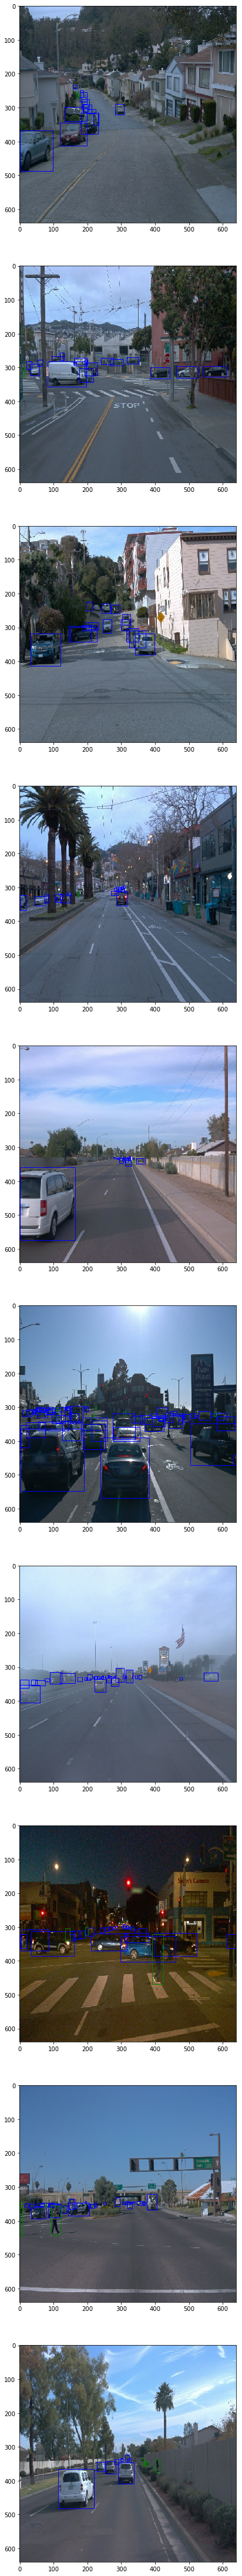

In [32]:
dataset = dataset.shuffle(98)
display_instances(dataset.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...